In [126]:
import pandas as pd
import numpy as np
import pandas_profiling
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import xgboost as xgb
from sklearn import tree
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from statsmodels.imputation import mice
from xgboost import XGBClassifier
#from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV 
from xgboost import plot_importance, plot_tree
from matplotlib import pyplot
from sklearn.feature_selection import SelectFromModel
from numpy import sort

In [127]:
f1 = 'train.csv'
f2 = 'test.csv'

In [ ]:
df = pd.read_csv(f1)
df2 = pd.read_csv(f2)

In [ ]:
#df.columns.value_counts().sum()
#df2.columns.value_counts().sum()

In [129]:
cols_todummies = ['AA3',	'AA5',	'AA6',	'DG3',	'DG3A',	'DG4',	
                  'DG6',	'DL1',	'DL2',	'DL5',	'DL12',	'DL15',	
                  'DL24',	'DL27',	'DL28',	'MT1A',	'MT5',	'MT6',	
                  'MT6A',	'MT6B',	'MT7A',	'MT9',	'MT11',	'MT13_2',	
                   'MT14_2',	'MT14A_2',	'MT14C_1',	'MT14C_2',	'MT14C_3',
                  'MT14C_4',	'MT17_1',	'MT17_2',	'MT17_3',	'MT17_4',	
                  'MT17_5',	'MT17_6',	'MT17_7',	'MT17_8',	'MT17_9',	
                  'MT17_10',	'MT17_11',	'MT17_12',	'MT17_13',	'FF2',	
                  'FF2A',	'FF3',	'FF5',	'FF6_1',	'FF6_2',	'FF6_3',	
                  'FF6_4',	'FF6_5',	'FF6_6',	'FF6_7',	'FF6_8',	
                  'FF6_9',	'FF6_10',	'FF9',	'FF13',	'FF16_1',	'FF16_2',	
                  'IFI14_1',	'IFI14_2',	'IFI14_3',	'IFI14_4',	'IFI14_5',	
                  'IFI14_6',	'IFI14_7',	'IFI15_1',	'IFI15_2',	'IFI15_3',	
                  'IFI15_4',	'IFI15_5',	'IFI15_6',	'IFI15_7',	'IFI16_1',	
                  'IFI16_2',	'IFI16_3',	'IFI16_4',	'IFI16_5',	'IFI16_6',	
                  'IFI16_7',	'IFI17_1',	'IFI17_2',	'IFI17_3',	'IFI17_4',	
                  'IFI17_5',	'IFI17_6',	'IFI17_7',	'IFI24',	'FL1',	
                  'FL2',	'FL3',	'FL4',	'FL7_1',	'FL7_2',	'FL7_3',	
                  'FL7_4',	'FL7_5',	'FL7_6',	'FL8_1',	'FL8_2',	
                  'FL8_3',	'FL8_4',	'FL8_5',	'FL8_6',	'FL8_7',	
                  'FL9A',	'FL9B',	'FL9C',	'FL10',	'FL11',	'FL12',	'FL13',	
                  'FL14',	'FL15',	'FL16',	'FL17',	'FL18',	'FB2',	'FB18',	
                  'FB19',	'FB19B_1',	'FB19B_2',	'FB19B_3',	'FB19B_4',	
                  'FB19B_5',	'FB19B_96',	'FB20',	'FB24',	'LN1A',	'LN1B',	
                  'LN2_1',	'LN2_2',	'LN2_3',	'LN2_4',	'GN1',	'GN2',	
                  'GN3',	'GN4',	'GN5']

#'language_1',	'language_2','language_3','language_4'

In [ ]:
#group questions together to create new features
#def sum_related_variables(df, cols, new_name):
#    return pd.DataFrame(
#        df[cols].replace(to_replace=2,value=0).sum(axis=1,min_count=1),
#        columns=[new_name])

#Have you ever used your Microfinance Institution account to do the following?
cols_IFI10 = ['IFI10_1','IFI10_2','IFI10_3','IFI10_4','IFI10_5','IFI10_6','IFI10_7','IFI10_8','IFI10_9','IFI10_10','IFI10_11','IFI10_12','IFI10_13','IFI10_14','IFI10_15',\
         'IFI10_16','IFI10_17','IFI10_18','IFI10_19','IFI10_20','IFI10_21','IFI10_22','IFI10_23']
df_IFI10 = df[cols_IFI10]
df_IFI10.replace(inplace=True,to_replace=2,value=0)
IFI10 = df_IFI10.sum(axis=1,min_count=1)
IFI10 = pd.DataFrame(IFI10,columns=['IFI10'])

df2_IFI10 = df2[cols_IFI10]
df2_IFI10.replace(inplace=True,to_replace=2,value=0)
IFI102 = df2_IFI10.sum(axis=1,min_count=1)
IFI102 = pd.DataFrame(IFI102,columns=['IFI10'])

#Have you ever used your post office account to do the following?
cols_IFI11 = ['IFI11_1',	'IFI11_2',	'IFI11_3',	'IFI11_4',	'IFI11_5',	'IFI11_6',	'IFI11_7',	'IFI11_8',	'IFI11_9',	'IFI11_10',	'IFI11_11',	'IFI11_12',\
         'IFI11_13',	'IFI11_14',	'IFI11_15',	'IFI11_16',	'IFI11_17',	'IFI11_18',	'IFI11_19',	'IFI11_20',	'IFI11_21',	'IFI11_22',	'IFI11_23']
df_IFI11 = df[cols_IFI11]
df_IFI11.replace(inplace=True,to_replace=2,value=0)
IFI11 = df_IFI11.sum(axis=1,min_count=1)
IFI11 = pd.DataFrame(IFI11,columns=['IFI11'])

df2_IFI11 = df2[cols_IFI11]
df2_IFI11.replace(inplace=True,to_replace=2,value=0)
IFI112 = df2_IFI11.sum(axis=1,min_count=1)
IFI112 = pd.DataFrame(IFI112,columns=['IFI11'])

#Have you ever used a mobile money account to do the following?
cols_MM15 =['MM15_1',	'MM15_2',	'MM15_3',	'MM15_4',	'MM15_5',	'MM15_6',	'MM15_7',	'MM15_8',	'MM15_9',	'MM15_10',	'MM15_11',	'MM15_12',\
       'MM15_13',	'MM15_14',	'MM15_15',	'MM15_16',	'MM15_17',	'MM15_18',	'MM15_19',	'MM15_20',	'MM15_21',	'MM15_22',	'MM15_23',]
df_MM15 = df[cols_MM15]
df_MM15.replace(inplace=True,to_replace=2,value=0)
MM15 = df_MM15.sum(axis=1,min_count=1)
MM15 = pd.DataFrame(MM15,columns=['MM15'])

df2_MM15 = df2[cols_MM15]
df2_MM15.replace(inplace=True,to_replace=2,value=0)
MM152 = df2_MM15.sum(axis=1,min_count=1)
MM152 = pd.DataFrame(MM152,columns=['MM15'])

#Have you ever used your SAVINGS AND/OR LENDING GROUP account to do the following?
cols_IFI12 =['IFI12_1',	'IFI12_2',	'IFI12_3',	'IFI12_4',	'IFI12_5',	'IFI12_6',	'IFI12_7',	'IFI12_8',	'IFI12_9',	'IFI12_10',	'IFI12_11',	'IFI12_12',\
       'IFI12_13',	'IFI12_14',	'IFI12_15',	'IFI12_16',	'IFI12_17',	'IFI12_18',	'IFI12_19',	'IFI12_20',	'IFI12_21',	'IFI12_22',	'IFI12_23']
df_IFI12 = df[cols_IFI12]
df_IFI12.replace(inplace=True,to_replace=2,value=0)
IFI12 = df_IFI12.sum(axis=1,min_count=1)
IFI12 = pd.DataFrame(IFI12,columns=['IFI12'])

df2_IFI12 = df2[cols_IFI12]
df2_IFI12.replace(inplace=True,to_replace=2,value=0)
IFI122 = df2_IFI12.sum(axis=1,min_count=1)
IFI122 = pd.DataFrame(IFI12,columns=['IFI12'])

#Have you experienced any of the following with an informal society/group you belong to? 
cols_IFI22 =['IFI22_1',	'IFI22_2',	'IFI22_3',	'IFI22_4',	'IFI22_5',	'IFI22_6',	'IFI22_7',	'IFI22_8',	'IFI22_9']
df_IFI22 = df[cols_IFI22]
df_IFI22.replace(inplace=True,to_replace=2,value=0)
IFI22 = df_IFI22.sum(axis=1,min_count=1)
IFI22 = pd.DataFrame(IFI22, columns=['IFI22'])

df2_IFI22 = df2[cols_IFI22]
df2_IFI22.replace(inplace=True,to_replace=2,value=0)
IFI222 = df2_IFI22.sum(axis=1,min_count=1)
IFI222 = pd.DataFrame(IFI222, columns=['IFI22'])

#Do you current have a loan with this organization? 
cols_FB16A =['FB16A_1',	'FB16A_2',	'FB16A_3',	'FB16A_4',	'FB16A_5',	'FB16A_6',	'FB16A_7']
df_FB16A = df[cols_FB16A]
df_FB16A.replace(inplace=True,to_replace=2,value=0)
FB16A = df_FB16A.sum(axis=1,min_count=1)
FB16A = pd.DataFrame(FB16A, columns=['FB16A'])

df2_FB16A = df2[cols_FB16A]
df2_FB16A.replace(inplace=True,to_replace=2,value=0)
FB16A2 = df2_FB16A.sum(axis=1,min_count=1)
FB16A2 = pd.DataFrame(FB16A2, columns=['FB16A'])


cd = ['MM12','MM30','IFI21']
df_cd = df[cd]
df_cd_dum = pd.get_dummies(df_cd,columns=cd)

df2_cd = df2[cd]
df2_cd_dum = pd.get_dummies(df2_cd,columns=cd)

In [131]:
#including language but as a binary
df_lang = df[['LN2_RIndLngBEOth', 'LN2_WIndLngBEOth']]
Y_train = df['is_female']
df = df.drop(['LN2_RIndLngBEOth', 'LN2_WIndLngBEOth','is_female'], axis=1)
#
df_lang = df_lang.replace('None',np.nan)
df_lang = df_lang.notnull().astype('int')

In [132]:
#including language as a binary for test data
df2_lang = df2[['LN2_RIndLngBEOth', 'LN2_WIndLngBEOth']]
df2 = df2.drop(['LN2_RIndLngBEOth', 'LN2_WIndLngBEOth'], axis=1)
df2_lang = df2_lang.replace('None',np.nan)
df2_lang = df2_lang.notnull().astype('int')

In [133]:
#remove all the columns with missing values >90%
df = df.dropna(thresh=0.1*len(df), axis=1)

In [134]:
#all categorical variables into dummy vars.
df_dum = pd.get_dummies(df, columns=cols_todummies)# does not include is_female
df2_dum = pd.get_dummies(df2, columns=cols_todummies)

In [135]:
#concatenate the dfs together 
df_concat = pd.concat([df_dum, df_cd_dum, IFI10, IFI11,MM15,IFI12,IFI22,FB16A,df_lang],axis=1)
#test
df2_concat = pd.concat([df2_dum, df2_cd_dum, IFI102, IFI112, MM152, IFI222, FB16A2,df2_lang], axis=1)

In [136]:
#create a list of columns in training and test
df_concat_cols = set(df_concat.columns)
df2_concat_cols = set(df2_concat.columns)

#df now only includes columns that are shared by the training and test set
final_cols = df_concat_cols.intersection(df2_concat_cols)
final_cols = list(final_cols)

In [137]:
#final training data and test data
X_train = df_concat[final_cols]
Testdata = df2_concat[final_cols]

In [114]:
#based on important features - removed any features with no important feature score

Impfeat = ['DG1',	'AA7',	'AA14',	'AA15',	'DL8',	'DL14',	'DG9a',	'DG8a',	'MT1',	'FB13',	'DG6_1',	
'DL3',	'MT6C',	'DL0',	'AA4',	'DL7',	'DG10b',	'DG9b',	'DL23',	'DG3_3',	'DG10c',	
'DG6_2',	'DL21',	'MT1A_1.0',	'DG9c',	'DL16',	'DG11b',	'DL17',	'DG3_6',	'FB2_2',	'MT18_1',	
'DL19',	'DG4_1',	'DL18',	'IFI18',	'DL22',	'DL20',	'DG5_7',	'DL4_99',	'DL15_1',	'DL15_4',	
'FL4_1',	'DL15_2',	'FL15_2',	'MT18A_1',	'DG5_6',	'FB24_15.0',	'FL11_2',	'FL6_1',	
'FL16_2',	'DL1_7',	'FL14_1',	'MT18_2',	'FL9A_1',	'MT6_1.0',	'FL8_1_2',	'IFI15_1_2',	
'FB15',	'MT1A_2.0',	'FL17_1',	'FB1_1',	'FL16_1',	'IFI14_1_3',	'DG3_1',	'FF14_1',	
'FL8_2_4',	'DG8c',	'FB4_1',	'DG8b',	'DL26_12',	'DL1_1',	'FL14_99',	'FL8_5_4',	'MT3_1',	
'FB20_15.0',	'AA6_7.0',	'FL9A_11']

#,	'MT18_8',	'FL8_3_4',	'LN2_2_1',	'LN1A_1',	'FB2_3',	
#'LN1B_1',	'MT4_1',	'FL1_4',	'FL8_5_2',	'MT4_2',	'GN5_1',	'IFI14_2_99',	'FL8_4_3',	
#'FB1_3',	'MT18_4',	'DG4_6',	'FL8_4_4',	'AA6_6.0',	'DG11c',	'FL8_6_3',	'LN2_1_1',	'DG6_3',	
#'FB18_5',	'IFI15_2_99',	'FL6_3',	'GN1_1.0',	'FL8_6_4',	'FB1_2',	'LN2_4_4',	'IFI17_1_1.0',	
#'LN2_3_4',	'FL2_2.0',	'FL17_2',	'IFI15_2_2',	'FL10_99',	'FB14',	'FB2_1',	'LN1A_4',	'FF14_2',	
#'FL8_7_3',	'IFI16_1_2.0',	'FL1_2',	'FL8_5_3',	'LN2_4_1',	'FL8_7_2',	'FL8_3_3',	'IFI16_1_1.0',	
#'FL8_7_4',	'FF7_4',	'FB26_1',	'MT12_7',	'LN2_3_1',	'MT18A_2',	'LN1B_4',	'FL8_6_2',	'MT18_3',	
#'DL24_3',	'IFI14_2_3',	'FB19_10',	'FL8_3_2',	'MT18_5',	'GN2_1',	'FL8_4_2',	'FF10_2',	'FL8_2_3',	
#'IFI17_2_1.0',	'DG12C_1',	'IFI17_1_2.0',	'FL10_11',	'FB4_3',	'FL8_1_3',	'FL15_99',	'DG5_4',	'MT12_2',	
#'FL4_2',	'DL11',	'FL11_99',	'DL25_3',	'DL24_2',	'DG4_5',	'FF7_2',	'FL17_99',	'DL15_3',	'MT15',	
#'FL8_1_4',	'FB26_99',	'FB26_10',	'FB16A',	'MT12_1',	'FL6_2',	'DG12B_2',	'LN1A_3',	'FL16_99',	
#'MT9_15.0',	'FL4_99',	'MT3_2',	'LN1B_2',	'IFI16_2_2.0',	'FL8_2_2',	'DL1_9',	'FB4_2',	'AA3_3',	
#'FB26_2',	'MT12_11',	'IFI24_2.0',	'FB26_8',	'FL3_3.0',	'MT3_3',	'FB26_6',	'FF3_99.0',	'MT17_3_6.0',	
#'GN3_1',	'FL9B_11.0',	'IFI15_3_99',	'MT17_2_1.0',	'FF5_1.0',	'GN4_1',	'FB4_4',	'FF6_1_2.0',	
#'DG3A_4',	'FL18_1',	'IFI14_1_2',	'IFI14_3_99',	'FL6_4',	'FL4_8',	'AA6_8.0',	'DL25_1',	'FL8_1_1',	
#'IFI15_2_1',	'GN3_3',	'LN2_WIndLngBEOth',	'FB20_2.0',	'FB20_1.0',	'IFI15_1_3',	'MT18A_4',	'IFI15_1_1',	
#'FF6_2_2.0',	'FB23_1',	'LN2_2_3',	'FL15_3',	'FF10_1',	'FF7_5',	'FF13_1.0',	'FB26_5',	'MT18A_3',	
#'GN2_3',	'IFI14_2_2',	'GN4_3',	'IFI16_2_1.0',	'FL11_1',	'DG12B_1',	'LN1A_2',	'FB19B_1_2.0',	'IFI14_1_99',	
#'FB26_11',	'MT17_1_1.0',	'DG4_7',	'MT1A_3.0',	'GN1_4.0',	'FF5_3.0',	'FF6_8_2.0',	'FL7_2_2',	'MT4_6',	'DL25_2',	
#'IFI15_2_3',	'LN2_1_3',	'DL2_2.0',	'FF6_4_2.0',	'FF2_1.0',	'IFI17_1_3.0',	'IFI17_2_2.0',	'GN4_4',	'LN2_3_5',	
#'IFI15_1_99',	'FB19B_2_2.0',	'LN1B_3',	'DL1_8',	'FL13_1',	'GN2_2',	'LN2_RIndLngBEOth',	'FB26_3',	'DG5_2',	
#'FF6_5_2.0',	'DG5_10',	'LN2_1_4',	'GN5_3',	'AA3_2',	'LN2_1_5',	'FL11_3',	'DL26_99',	'DG12C_2',	'LN2_2_4',	
#'FF6_9_2.0',	'DG5_1',	'FF6_7_2.0',	'FL14_2',	'DL24_99',	'DL1_99',	'FF6_3_2.0',	'DL24_1',	'DL12_11.0',	
#'G2P1_9',	'IFI24_10.0',	'FF6_2_1.0',	'FF6_6_2.0',	'LN2_4_5',	'DG5_5',	'GN5_4',	'MT17_8_6.0',	'FF6_10_2.0',	
#'FB18_1',	'IFI14_1_4',	'IFI24_4.0',	'FF9_3.0',	'FB26_7',	'FL9B_2.0',	'FL2_3.0',	'FL15_1',	'IFI16_1_3.0',	'DL24_5',	
#'FL1_1',	'FF7_1',	'FL18_99',	'FB19B_5_2.0',	'MT1A_99.0',	'DL2_12.0',	'GN1_3.0',	'GN2_4',	'MT4_3',	'FF19_4',	
##'G2P1_99',	'FB19B_4_2.0',	'AA5_3.0',	'MT6A_1.0',	'GN3_2',	'DL2_1.0',	'LN2_3_3',	'FB19B_3_2.0',	'GN3_4',	'MT9_2.0',	
#'MT4_4',	'FL10_1',	'MT4_5',	'G2P1_11',	'MT17_11_6.0',	'DL5_5.0',	'AA5_5.0',	'FL7_1_2',	'DL4_5',	'MT17_6_6.0',	
#'DL1_6',	'FL7_4_2',	'DL1_10',	'GN1_2.0',	'FL8_5_1',	'IFI14_7_99',	'DL4_6',	'FL7_3_2',	'MT12_3',	'MT14C_3_1.0',	
#'IFI15_7_99',	'FL1_3',	'LN2_1_2',	'FL10_2',	'GN5_2',	'DL6',	'IFI14_1_1',	'FF4',	'MT17_4_6.0',	'GN3_99',	
#'DL2_30.0',	'FL9C_11.0',	'MT14C_1_1.0',	'IFI17_2_99.0',	'MT17_2_2.0',	'DG3_5',	'FL10_4',	'FB19B_2_99.0',	'FB17_8',	
#'IFI14_2_4',	'FB19B_5_99.0',	'LN2_2_5',	'FB22_1',	'FB22_8',	'MT6_2.0',	'GN5_99',	'FB26_4',	'MT6B_1.0',	'DL5_6.0',	
#'FB16A_8',	'MT9_1.0',	'FF9_5.0',	'GN4_99',	'MT5_1.0',	'DG4_4',	'IFI14_5_99',	'G2P1_8',	'IFI14_4_99',	'FB19B_4_99.0',	
#'FF16_2_3.0',	'IFI14_2_1',	'MT17_3_1.0',	'FF19_1',	'LN2_2_2',	'FB19B_1_99.0',	'DL25_4',	'FF2A_1.0',	'FB19_1',	'FL2_1.0',	
#'MT17_9_6.0',	'GN4_2',	'FB19B_96_99.0',	'IFI16_2_3.0',	'DG6_99',	'GN2_99',	'FF6_3_1.0',	'FB19B_3_99.0',	'IFI16_2_99.0',	
#'MT17_5_6.0',	'FL7_5_2',	'FF3_6.0',	'DL2_32.0',	'DG3A_2',	'FF3_2.0',	'MT17_12_6.0',	'MT14C_2_2.0',	'IFI24_6.0',	'FF6_10_99.0',	
#'FF9_4.0',	'AA5_2.0',	'FL3_2.0',	'FL8_2_5',	'FL11_4',	'FF19_3',	'MT12_4',	'FL8_3_5',	'MM1',	'MT7A_2.0',	'FL8_7_5',	'FL9B_6.0',	
#'FB20_14.0',	'FF2A_2.0',	'MT1A_4.0',	'MT14C_3_2.0',	'MT17_1_2.0',	'FB24_1.0',	'MT16_1',	'DL25_5',	'MT14C_4_2.0',	'LN2_4_3',	
#'MT17_7_6.0',	'FL12_1',	'DL24_4',	'FL13_99',	'FF2A_13.0',	'IFI22',	'IFI17_1_99.0',	'FB19B_96_2.0',	'FF16_1_3.0',	'FL3_8.0',	
#'FL7_3_99',	'MT14C_2_1.0',	'MT12_9',	'MT14_2_1.0',	'DL4_17',	'MT8',	'IFI15_5_99',	'G2P1_7',	'FF2_2.0',	'DL1_2',	'DG13_2',	'FL7_1_99',	'MT16_2',	'DG13_7',	'FL7_2_99',	'MT14C_4_1.0',	'FL9A_3',	'FB27_2',	'MT17_3_2.0',	'FL7_6_2',	'FF3_1.0',	'G2P1_1',	'DG13_1',	'DL24_9',	'IFI15_4_99',	'FB20_3.0',	'MM3_2',	'FL9B_7.0',	'FL7_6_99',	'IFI15_4_2',	'MT16_3',	'DG13_3',	'MT7',	'FF9_6.0',	'IFI17_2_3.0',	'DG3_4',	'FL9C_1.0',	'FF6_7_1.0',	'MT17_13_6.0',	'MT17_10_6.0',	'FL8_3_1',	'FF6_8_1.0',	'FL8_6_5',	'DG6_7',	'MT18_6',	'FF16_2_5.0',	'FL9C_3.0',	'FL10_5',	'FL8_7_1',	'DL26_5',	'IFI24_1.0',	'FF13_2.0',	'DL1_5',	'MT17_2_6.0',	'DG4_10',	'FL9B_3.0',	'FF19_2',	'FB20_6.0',	'FF2A_12.0',	'IFI16_1_7.0',	'FL9C_7.0',	'FL8_5_5',	'DL1_3',	'FL8_4_5',	'FF6_5_1.0',	'FL7_4_99',	'FB4_96',	'FL9C_6.0',	'FL3_4.0',	'MT6_3.0',	'MT14A_2_1.0',	'FL12_99',	'IFI17_1_4.0',	'FL3_1.0',	'FF6_1_99.0',	'FL8_1_5',	'MT1A_5.0',	'FF6_1_1.0',	'FF6_3_99.0',	'GN1_99.0',	'FF6_4_99.0',	'MT14C_2_4.0',	'DL25_8',	'MT14C_1_2.0',	'DG3_8',	'FF6_6_1.0',	'DL28_1.0',	'DL1_4',	'DG4_3',	'IFI16_1_6.0',	'FF6_9_99.0',	'FF3_5.0',	'MT12_13',	'IFI16_1_99.0',	'IFI14_2_6',	'FL9A_6',	'FF16_1_5.0',	'AA3_1',	'FL7_1_1',	'IFI17_3_2.0',	'FF6_6_99.0',	'DL2_9.0',	'FF6_4_1.0',	'FB18_3',	'MT9_4.0',	'IFI14_6_99',	'MT17_7_1.0',	'FF6_2_99.0',	'MT9_3.0',	'FF6_5_99.0',	'FF6_7_99.0',	'IFI15_1_4',	'FL10_8',	'DL26_1',	'DL25_7',	'G2P1_13',	'FL9C_8.0',	'LN2_3_2',	'FF2A_16.0',	'DL4_2',	'MT16_99',	'IFI17_3_99.0',	'FF14_23',	'FL7_5_99',	'IFI15_3_3',	'IFI15_3_2',	'FF3_4.0',	'DG4_99',	'IFI15_6_99',	'DL2_4.0',	'DG3_99',	'DL25_6',	'FF7_96',	'IFI15_2_4',	'DG3_2',	'FL9B_1.0',	'FB19_2',	'FF6_8_99.0',	'IFI16_3_2.0',	'IFI14_3_3',	'FF19_6',	'IFI14_1_5',	'IFI1_3',	'DL2_6.0',	'MT16_4',	'FF16_2_4.0',	'FL9A_7',	'FB18_2',	'FF19_5',	'FB24_2.0',	'FL10_7',	'DL27_5.0',	'DG13_5',	'IFI17_2_5.0',	'AA5_4.0',	'FF7_6',	'AA5_1.0',	'MT11_98.0',	'FB19A_4',	'MM3_13',	'FF6_9_1.0',	'DG4_11',	'MT17_1_6.0',	'IFI16_3_99.0',	'FL10_3',	'FF14_19',	'DL26_2',	'IFI10',	'IFI16_7_1.0',	'FB19_3',	'MT6_5.0',	'MT5_99.0',	'DL5_16.0',	'MT14A_2_2.0',	'DG4_2',	'IFI14_3_2',	'DG6_4',	'MT6A_2.0',	'FF7_3',	'DL5_2.0',	'IFI17_1_5.0',	'FB22_12',	'MT17_7_2.0',	'MT17_8_1.0',	'MT13_2_1.0',	'MT16_96',	'IFI17_4_99.0',	'IFI16_2_7.0',	'FF2_3.0',	'MT14C_3_3.0',	'FL8_2_1',	'FF19_7',	'G2P1_14',	'DL2_11.0',	'FL7_2_1',	'IFI17_7_1.0',	'FL8_4_1',	'MT17_5_1.0',	'DL1_96',	'MT17_5_2.0',	'FL9C_2.0',	'DL27_1.0',	'FL9A_8',	'LN2_4_2',	'IFI16_4_99.0',	'DG6_5',	'FF14_16',	'DL4_16',	'FB26_9',	'MM12_5.0',	'FF14_11',	'FF9_2.0',	'FF14_4',	'IFI3_3',	'MT17_6_2.0',	'IFI16_1_8.0',	'FF16_2_1.0',	'IFI14_2_5',	'DG3A_1',	'FB16_1',	'FF10_3',	'IFI17_2_4.0',	'FB20_10.0',	'FL9A_2',	'FB29_3',	'FF16_1_4.0',	'IFI14_7_2',	'IFI1_5',	'IFI15_7_2',	'IFI17_3_3.0',	'MT17_4_2.0',	'FL7_4_1',	'FB3',	'DL2_3.0',	'IFI14_1_6',	'IFI14_5_3',	'MT17_11_2.0',	'DL2_19.0',	'MT11_99.0',	'MT9_7.0',	'FF14_9',	'MT17_12_1.0',	'IFI15_6_2',	'DL2_29.0',	'FF14_3',	'FB24_5.0',	'G2P1_4',	'MT9_13.0',	'MT6_99.0',	'FB29_1',	'FF2A_5.0',	'FL9A_5',	'IFI14_4_4',	'IFI14_6_2',	'MT14C_4_3.0',	'FB16_2',	'IFI15_5_3',	'DL26_3',	'DG5_3',	'MT6A_99.0',	'MT14C_2_3.0',	'MT12_12',	'DL4_1',	'MT11_36.0',	'FL9B_8.0',	'IFI15_3_5',	'IFI14_3_4',	'MT17_9_1.0',	'MT7A_1.0',	'MT17_6_1.0',	'IFI14_7_1',	'FL10_9',	'FL8_6_1',	'IFI16_3_7.0',	'FF16_1_1.0',	'FF7_7',	'IFI24_5.0',	'FB20_9.0',	'DL26_4',	'MT17_13_4.0',	'MT17_3_3.0',	'MT18_96',	'IFI17_5_99.0',	'FB19A_1',	'FB19_9',	'MT17_11_1.0',	'IFI24_3.0',	'MT14C_3_4.0',	'MT11_1.0',	'IFI15_7_1',	'IFI16_7_2.0',	'MT17_6_3.0',	'MT17_4_1.0',	'DG3A_99',	'G2P1_3',	'DL27_4.0',	'IFI16_3_1.0',	'FL10_10',	'MT13_2_6.0',	'FF3_3.0',	'DG3_7',	'GN1_96.0',	'FF3_18.0',	'FF1',	'FL3_5.0',	'DL5_18.0',	'FL10_6',	'DL28_11.0',	'IFI17_4_2.0',	'FB16_8',	'FF16_2_2.0',	'DL26_8',	'IFI17_3_1.0',	'IFI17_5_2.0',	'FL2_4.0',	'DL4_3',	'IFI21_2.0',	'G2P1_12',	'DL5_1.0',	'IFI17_7_99.0',	'DL27_3.0',	'MT11_24.0',	'FB19_7',	'FB16_7',	'IFI15_5_2',	'FL9B_5.0',	'DL2_7.0',	'DG13_4',	'DL2_96.0',	'IFI14_3_6',	'IFI15_3_4',	'IFI16_5_99.0',	'IFI14_3_1',	'AA3_4',	'FL4_3',	'MT14A_2_3.0',	'IFI16_2_6.0',	'FB26_96',	'FF10_96',	'IFI14_4_2',	'DL2_5.0',	'FF14_22',	'G2P1_10',	'G2P1_96',	'FF10_4',	'IFI15_7_3',	'IFI17_7_2.0',	'FF19_8',	'IFI16_4_8.0',	'FF14_15',	'IFI15_6_3',	'FB29_2',	'MT14C_4_4.0',	'FB18_4',	'DL5_17.0',	'MT14C_1_3.0',	'MT9_10.0',	'IFI1_7',	'IFI14_5_4',	'IFI15_4_3',	'IFI1_1',	'DG4_8',	'DL5_19.0',	'MT12_14',	'MT17_9_2.0',	'IFI16_6_2.0',	'MT13_2_99.0',	'MT17_2_3.0',	'FF14_10',	'FF6_10_1.0',	'FB20_13.0',	'DL26_9',	'FF14_18',	'MT17_10_1.0',	'FB16_6',	'MT17_10_2.0',	'IFI16_4_2.0',	'FB19A_5',	'FF16_1_2.0',	'IFI16_3_3.0',	'IFI15_3_1',	'DL27_12.0',	'IFI14_6_3',	'FL3_6.0',	'DL4_18',	'IFI16_5_3.0',	'FF9_1.0',	'IFI14_4_3',	'IFI11',	'DL12_1.0',	'G2P1_6',	'MT17_4_3.0',	'FL9C_4.0',	'MT17_13_1.0',	'IFI14_5_6',	'FF14_5',	'IFI15_1_5',	'DG5_11',	'G2P1_16',	'MT17_10_3.0',	'MT14_2_99.0',	'FB19A_2',	'FL7_5_1',	'MT12_10',	'G2P1_15',	'FB27_1',	'MT7A_3.0',	'FB19A_3',	'MT17_1_3.0',	'DL27_9.0',	'MT11_8.0',	'IFI17_6_2.0',	'MM15',	'DG13_96',	'IFI17_3_5.0',	'IFI14_7_3',	'DG3A_5',	'MT12_5',	'FL9A_4',	'MT11_2.0',	'FF14_20',	'FL7_3_1',	'MMP1_1',	'IFI14_6_1',	'MM3_1',	'MT7A_4.0',	'MT7A_7.0',	'IFI16_6_99.0',	'MT12_8',	'IFI16_5_2.0',	'MT17_12_2.0',	'MT17_9_4.0',	'MT5_2.0',	'DG3A_3',	'MT17_11_3.0',	'DL5_3.0',	'IFI14_4_6',	'IFI17_6_3.0',	'IFI16_4_1.0',	'FF14_17',	'FB22_9',	'IFI16_7_99.0',	'DL26_6',	'FF3_23.0',	'FL9C_5.0',	'FB20_8.0',	'MT17_8_2.0',	'FB29_5',	'IFI3_1',	'IFI17_5_3.0',	'MT12_96',	'FF14_7',	'FF10_6',	'IFI14_5_5',	'IFI14_5_2',	'MT17_3_5.0',	'FF2A_6.0',	'DL28_4.0',	'FB20_11.0',	'FB19B_1_1.0',	'FF14_6',	'IFI14_7_4',	'MT6B_99.0',	'FB22_10',	'MT17_7_5.0',	'FF5_2.0',	'G2P1_2',	'MT17_13_2.0',	'MT17_8_3.0',	'DL4_19',	'FL7_6_1',	'FF3_10.0',	'FL9A_96',	'MT12_6',	'FL9C_9.0',	'FF10_5',	'FF14_21',	'DG3A_96',	'MT9_14.0',	'DL28_16.0',	'MT17_10_4.0',	'MT6_4.0',	'DL5_21.0',	'IFI17_6_99.0',	'DL2_8.0',	'DL4_7',	'FL9B_4.0',	'IFI16_5_1.0',	'DL4_13',	'IFI17_4_3.0',	'IFI17_4_1.0',	'IFI14_4_1',	'FF14_12',	'IFI14_5_1',	'IFI14_6_4',	'IFI14_7_6',	'G2P1_5',	'FF3_7.0',	'IFI16_6_1.0',	'FB19B_2_1.0',	'IFI14_4_5',	'MT11_45.0',	'DL4_20',	'MT5_4.0',	'FF2A_9.0',	'FL9A_9',	'FB19B_96_1.0',	'FL9B_10.0',	'DL4_4',	'DL2_10.0',	'MT17_13_3.0',	'DL2_20.0',	'MM2_13',	'FB19_96',	'IFI16_1_96.0',	'MM12_2.0',	'IFI17_5_1.0',	'DL5_7.0',	'IFI16_7_3.0',	'FB19B_3_1.0',	'FB24_13.0',	'MT17_12_3.0',	'FL9B_9.0',	'MM2_2',	'IFI16_7_4.0',	'MT17_7_4.0',	'IFI15_4_1',	'MT11_6.0',	'IFI15_6_1',	'MM12_1.0',	'FB22_3',	'DL28_12.0',	'MT11_48.0',	'IFI17_7_3.0',	'FB27_3',	'MT11_15.0',	'IFI15_5_1',	'IFI15_5_6',	'MT14_2_2.0',	'DL2_21.0',	'IFI15_2_6',	'FB29_6',	'DL26_10',	'IFI16_6_3.0',	'IFI15_7_4',	'IFI16_3_8.0',	'GN2_96',	'IFI14_3_5',	'FL9C_10.0',	'MT17_5_3.0',	'MT17_9_3.0',	'MT7A_99.0',	'DL26_7',	'FB19B_4_1.0',	'FB19B_5_1.0',	'MT17_8_5.0',	'DL5_4.0',	'MT14C_1_4.0',	'IFI17_6_1.0',	'DL2_23.0',	'DG4_9',	'DL28_99.0',	'FF14_96',	'MM2_1',	'MT11_60.0',	'MT17_8_4.0',	'FF14_14',	'FF2A_10.0',	'MT17_2_5.0',	'DL5_20.0',	'FB27_4',	'MMP1_3',	'MT9_12.0',	'MT11_12.0',	'IFI15_5_4',	'FB20_4.0',	'IFI15_2_5',	'DL5_96.0',	'DL12_9.0',	'IFI17_6_4.0',	'IFI15_5_5',	'IFI21_1.0',	'FB19A_96',	'MT6B_2.0',	'MT17_3_4.0',	'MT17_11_4.0',	'MT17_2_4.0',	'MT11_18.0',	'DL4_21',	'DL4_96',	'IFI14_6_5',	'IFI3_2',	'FF2A_96.0',	'IFI21_14.0',	'IFI16_1_4.0',	'IFI16_2_8.0',	'MT17_4_4.0',	'FL12_2',	'DL28_3.0',	'FF14_8',	'MT17_4_5.0',	'MM3_6',	'IFI16_7_7.0',	'IFI17_4_5.0',	'FB24_96.0',	'MT17_6_4.0',	'IFI21_15.0',	'IFI15_4_6',	'IFI15_3_6',	'MT2',	'IFI15_4_5',	'MT17_1_5.0',	'DL5_9.0',	'IFI16_4_3.0',	'MT6A_4.0',	'MT17_5_4.0',	'MM3_4',	'IFI15_6_4',	'FF2A_3.0',	'MT17_5_5.0',	'MMP1_2',	'DG5_8',	'MT13_2_3.0',	'MM3_8',	'IFI17_3_4.0',	'FF2A_15.0',	'DL5_13.0',	'MT11_22.0',	'MM3_5',	'MM3_14',	'FB22_4',	'MT17_9_5.0',	'DL4_14',	'GN5_96',	'DL4_9',	'DL4_8',	'FB20_12.0',	'FB24_4.0',	'DL27_6.0',	'MT11_3.0',	'MM3_10',	'MT17_13_5.0',	'DL4_23',	'FF2A_11.0',	'IFI21_4.0',	'IFI16_3_4.0',	'MT17_6_5.0',	'MM3_11',	'FF14_13',	'IFI1_2',	'FB19_6',	'MT11_35.0',	'GN4_96',	'FL4_4',	'FF3_14.0',	'FB20_5.0',	'DL12_3.0',	'IFI1_6',	'IFI16_2_5.0',	'IFI15_4_4',	'FB19_5',	'DL28_7.0',	'IFI16_5_8.0',	'DL5_10.0',	'IFI14_6_6',	'MT17_11_5.0',	'FB29_4',	'IFI1_9',	'MT5_5.0',	'MM3_3',	'FB22_11',	'GN3_96',	'DL28_13.0',	'DL5_14.0',	'DL2_16.0',	'FF2A_14.0',	'FB24_11.0',	'IFI17_7_4.0',	'MT17_12_5.0',	'IFI16_5_4.0',	'IFI21_9.0',	'FF3_11.0',	'MT13_2_5.0',	'MT11_10.0',	'MT11_16.0',	'IFI17_5_4.0',	'MM12_13.0',	'FB24_3.0',	'IFI16_6_7.0',	'IFI17_4_4.0',	'DL28_2.0',	'MT17_7_3.0',	'MT6_6.0',	'IFI15_6_6',	'FB27_9',	'IFI16_4_4.0',	'MT6A_96.0',	'FB16_3',	'MT11_72.0',	'IFI24_8.0',	'MM12_17.0',	'IFI16_2_4.0',	'MT17_10_5.0',	'MT11_5.0',	'DL2_15.0',	'MM12_12.0',	'FB24_7.0',	'MM2_8',	'IFI17_5_5.0',	'FF3_17.0',	'DL2_18.0',	'MT17_12_4.0',	'DL12_4.0',	'IFI14_7_5',	'IFI24_7.0',	'FF3_8.0',	'DL27_2.0',	'FL18_2',	'MT11_28.0',	'MT14_2_5.0',	'MT11_25.0',	'MT14A_2_4.0',	'MM12_11.0',	'MT9_11.0',	'DL4_15',	'IFI16_7_8.0',	'MM3_7',	'IFI16_6_8.0',	'DL4_22',	'IFI16_5_7.0',	'FF3_22.0',	'DL4_10']


X_train = df_concat[Impfeat]
Testdata = df2_concat[Impfeat]

In [ ]:
a = pd.DataFrame(X_train.columns)
a.to_csv('traincols.csv')

In [138]:
# split data into train and test sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X_train, Y_train, test_size=0.1, random_state=7)

In [139]:
#http://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn
#gradient descent?

clf = XGBClassifier(objective='binary:logistic', nthread=4, silent=False, learning_rate=0.01,\
                    max_depth=10, colsample_bytree=0.5, subsample=0.7, n_estimators=5000,seed=7)
eval_set  = [(Xtrain, ytrain), (Xtest, ytest)]

In [ ]:
clf.fit(Xtrain, ytrain, eval_set=eval_set,eval_metric="auc", early_stopping_rounds=200)

In [43]:
#K folds cross val
kfold = KFold(n_splits=5, random_state=7)
results = cross_val_score(clf, X_train, Y_train, cv=5,scoring='roc_auc')#cv=kfold
print("AUC: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

AUC: 96.83% (0.22%)


In [44]:
results

array([ 0.96540166,  0.96674668,  0.97179527,  0.96852152,  0.96908458])

In [ ]:
#gridsearch
clf = XGBClassifier(objective='binary:logistic', nthread=4, silent=False, n_estimators=5000,\
                   subsample=0.7,max_depth=10,learning_rate=0.01,seed=7)#colsample_bytree=0.7
test_params = {
    #'max_depth':[2,5,10], #10
    #'learning_rate': [0.01,0.02,0.05], #0.01
    'colsample_bytree':[0.5,0.7,1], #0.5
    #'subsample':[0.5,0.7,1] #?
}

model = GridSearchCV(estimator=clf,param_grid= test_params,cv=5)
model.fit(X_train, Y_train)
print(model.best_params_)

In [140]:
#using the entire dataset
clf.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.5,
       gamma=0, learning_rate=0.01, max_delta_step=0, max_depth=10,
       min_child_weight=1, missing=None, n_estimators=5000, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=7, silent=False, subsample=0.7)

In [ ]:
clf.best_iteration

In [141]:
#ypred = clf.predict_proba(Testdata,ntree_limit=clf.best_iteration)
ypred = clf.predict_proba(Testdata)

In [142]:
ypreddf = pd.DataFrame(ypred,columns=['is_male','is_female']).drop('is_male',axis=1)
ypreddf.index.names = ['test_id']

In [143]:
ypreddf.to_csv('C:/Users/Kim.Vuong/Documents/Kaggle/WIDDatathon/test submissions/024.csv')

In [ ]:
featureImp = pd.DataFrame(clf.feature_importances_)
featureImp.to_csv('feat_importance.csv')

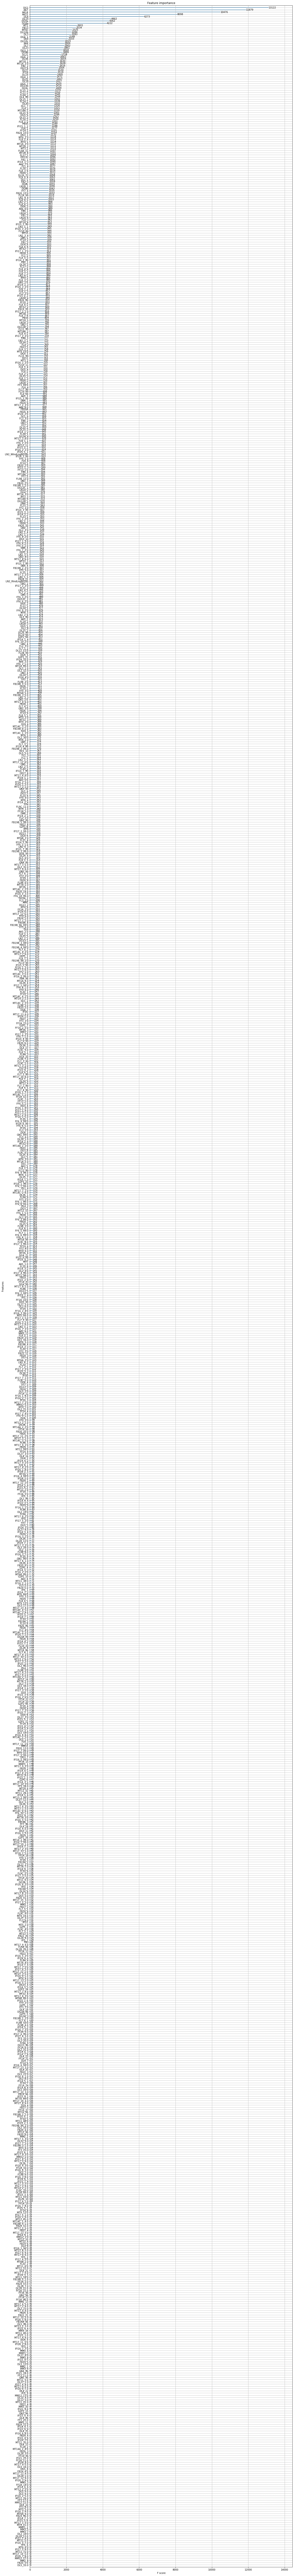

In [113]:
## work in progress - to get feature importance.

# plot feature importance
ax = plot_importance(clf)
fig = ax.figure
fig.set_size_inches(20, 200)

In [112]:
ax =  plot_tree(clf)
fig = ax.figure
fig.set_size_inches(400,500)
fig.savefig('tree.png')

In [123]:
#shows important features in xgboost
from eli5 import show_weights, show_prediction, explain_prediction
show_weights(clf)

In [121]:
#shows the prediction for one line in the training data - explains the prediction
#contribution shows how much each feature contributed to the final prediction across all trees
show_prediction(clf,X_train.iloc[4],show_feature_values=True)

In [125]:
explain_prediction(clf,X_train.iloc[4])

Explanation(estimator="XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.5,\n       gamma=0, learning_rate=0.01, max_delta_step=0, max_depth=10,\n       min_child_weight=1, missing=None, n_estimators=5000, nthread=4,\n       objective='binary:logistic', reg_alpha=0, reg_lambda=1,\n       scale_pos_weight=1, seed=7, silent=False, subsample=0.7)", description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble. Each leaf has an output score, and expected scores can also be\nassigned to parent nodes. Contribution of one feature on the decision path\nis how much expected score changes from parent to child. Weights of all \nfeatures sum to the output score of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does show how increasing or decreasing\n   the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision paths', is_regression=False, targets=[TargetExplanation(target=1, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='DL1_7', weight=2.4100050842152232, std=None, value=1.0), FeatureWeight(feature='DG6_2', weight=1.662772352912627, std=None, value=1.0), FeatureWeight(feature='DL0', weight=0.72368740060641157, std=None, value=2.0), FeatureWeight(feature='DG6_1', weight=0.3228629943903143, std=None, value=0.0), FeatureWeight(feature='<BIAS>', weight=0.29407447599632441, std=None, value=1.0), FeatureWeight(feature='AA7', weight=0.242332211765519, std=None, value=436161.0), FeatureWeight(feature='MT1A_1.0', weight=0.23624675243445259, std=None, value=0.0), FeatureWeight(feature='MT6_1.0', weight=0.21352965850526218, std=None, value=0.0), FeatureWeight(feature='DL8', weight=0.21105962078924251, std=None, value=nan), FeatureWeight(feature='AA14', weight=0.21079812707155765, std=None, value=5645.0), FeatureWeight(feature='DL23', weight=0.19722190571365661, std=None, value=2.0), FeatureWeight(feature='IFI14_1_3', weight=0.19259731364225985, std=None, value=1.0), FeatureWeight(feature='FL11_2', weight=0.1835396430720766, std=None, value=0.0), FeatureWeight(feature='DG1', weight=0.17544889967293936, std=None, value=1958.0), FeatureWeight(feature='MT6C', weight=0.17305105181167016, std=None, value=nan), FeatureWeight(feature='MT18A_1', weight=0.16280517571368056, std=None, value=2.0), FeatureWeight(feature='MT18_1', weight=0.15381716625141326, std=None, value=nan), FeatureWeight(feature='MT3_1', weight=0.15229321507058566, std=None, value=nan), FeatureWeight(feature='DG3_1', weight=0.14856496055262489, std=None, value=0.0), FeatureWeight(feature='IFI18', weight=0.13112812688361691, std=None, value=99.0), FeatureWeight(feature='DL1_1', weight=0.12406949850780145, std=None, value=0.0), FeatureWeight(feature='DG5_6', weight=0.12357483877278386, std=None, value=1.0), FeatureWeight(feature='FF14_1', weight=0.11979050695910931, std=None, value=nan), FeatureWeight(feature='FL14_99', weight=0.11254738646853797, std=None, value=0.0), FeatureWeight(feature='DL7', weight=0.099488940435619719, std=None, value=nan), FeatureWeight(feature='FL15_2', weight=0.097325605375063601, std=None, value=0.0), FeatureWeight(feature='FL17_1', weight=0.095836116314892403, std=None, value=1.0), FeatureWeight(feature='FB24_15.0', weight=0.095248559054300685, std=None, value=0.0), FeatureWeight(feature='DL15_2', weight=0.093140779011638669, std=None, value=0.0), FeatureWeight(feature

In [ ]:
sfm = SelectFromModel(clf, threshold=0.025)
sfm.fit(X_train, Y_train)
n_features = sfm.transform(X).shape[1]

In [78]:
len(Xtest)

1826